# Star Wars Survey

## Introduction
This project is based in questions about _Star Wars_ fans by the team at [_FiveThirtyEight_](https://fivethirtyeight.com/) while waiting for _Star Wars: The Force Awakens_ to come out. In particular, they wondered: __does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?__
To answer this, they surveyed 835 fans with an online tool and came to the [dataset](https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv) we'll be working with.

Let's start by reading the dataset and importing relevant libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [2]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Columns
We can see a description of some of the columns in the dataset:

- __RespondentID__ - An anonymized ID for the respondent
- __Gender__ - The respondent's gender
- __Age__ - The respondent's age
- __Household Income__ - The respondent's income
- __Education__ - The respondent's education level
- __Location (Census Region)__ - The respondent's location
- __Have you seen any of the 6 films in the Star Wars franchise?__ (Has a __Yes__ or __No__ response)
- __Do you consider yourself to be a fan of the Star Wars film franchise?__ (Has a __Yes__ or __No__ response)

There are several other columns containing answers to questions about the _Star Wars_ movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

## Data cleaning
Let's remove invalid rows, such as the ones that have a blank Responser ID, and convert __Yes/No__ columns to boolean (+ Nan) to make it easier to work with.

In [3]:
star_wars=star_wars[pd.notnull(star_wars["RespondentID"])]

yes_no={"Yes":True,"No":False}
cols=["Have you seen any of the 6 films in the Star Wars franchise?","Do you consider yourself to be a fan of the Star Wars film franchise?"]

for c in cols:
    star_wars[c]=star_wars[c].map(yes_no)

print(star_wars[cols[0]].value_counts(dropna=False))
print('\n')
print(star_wars[cols[1]].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


We could check that the first question does not present Nan values, while the second does.

We have some questions that are multiple-choice (checkbox) style, so we will convert the values in those columns. The respondent checked off a series of boxes in response to the question, __Which of the following Star Wars films have you seen? Please select all that apply.__

The columns for this question are:

- __Which of the following Star Wars films have you seen? Please select all that apply.__ - Whether or not the respondent saw _Star Wars: Episode I The Phantom Menace_.
- __Unnamed: 4__ - Whether or not the respondent saw _Star Wars: Episode II Attack of the Clones_.
- __Unnamed: 5__ - Whether or not the respondent saw _Star Wars: Episode III Revenge of the Sith_.
- __Unnamed: 6__ - Whether or not the respondent saw _Star Wars: Episode IV A New Hope_.
- __Unnamed: 7__ - Whether or not the respondent saw _Star Wars: Episode V The Empire Strikes Back_.
- __Unnamed: 8__ - Whether or not the respondent saw _Star Wars: Episode VI Return of the Jedi_.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie (we'll assume that they didn't see it).

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive.

In [4]:
ans_bool={"Star Wars: Episode I  The Phantom Menace":True,
    np.nan:False,"NaN":False,
    "Star Wars: Episode II  Attack of the Clones":True,
    "Star Wars: Episode III  Revenge of the Sith":True,
    "Star Wars: Episode IV  A New Hope":True,
    "Star Wars: Episode V The Empire Strikes Back":True,
    "Star Wars: Episode VI Return of the Jedi":True}

for col in star_wars.columns[3:9]:
    star_wars[col]=star_wars[col].map(ans_bool)
    
star_wars=star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.":"seen_1",
        "Unnamed: 4":"seen_2",
        "Unnamed: 5":"seen_3",
        "Unnamed: 6":"seen_4",
        "Unnamed: 7":"seen_5",
        "Unnamed: 8":"seen_6"})

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite, so we will have values from 1 to 6 or NaN.
There are some column names that need to be changed, as done before:
- __Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.__ - How much the respondent liked _Star Wars: Episode I The Phantom Menace_
- __Unnamed: 10__ - How much the respondent liked _Star Wars: Episode II Attack of the Clones_
- __Unnamed: 11__ - How much the respondent liked _Star Wars: Episode III Revenge of the Sith_
- __Unnamed: 12__ - How much the respondent liked _Star Wars: Episode IV A New Hope_
- __Unnamed: 13__ - How much the respondent liked _Star Wars: Episode V The Empire Strikes Back_
- __Unnamed: 14__ - How much the respondent liked _Star Wars: Episode VI Return of the Jedi_

Let's change those names and convert the content into numeric.

In [5]:
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)
star_wars=star_wars.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
        "Unnamed: 10":"ranking_2",
        "Unnamed: 11":"ranking_3",
        "Unnamed: 12":"ranking_4",
        "Unnamed: 13":"ranking_5",
        "Unnamed: 14":"ranking_6"})

star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


## Analysing preference

Now, with these convertions performed, we can see the movies average ranking.

In [6]:
means=star_wars[star_wars.columns[9:15]].mean()
print(means)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


<Container object of 6 artists>

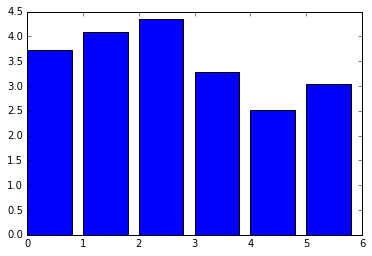

In [13]:
plt.bar(range(6),means)

By remembering that lower value is most prefered, we can see that _Star Wars: Episode V The Empire Strikes Back_ is the most liked film. The first episodes seem to be the least prefered.

Besides the ranking, we can see which is the most seen movie in a simmilar fashion.

In [14]:
sums=star_wars[star_wars.columns[3:9]].sum()
print(sums)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


<Container object of 6 artists>

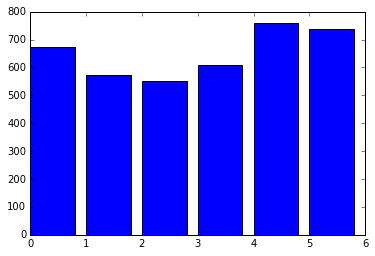

In [15]:
plt.bar(range(6),sums)

We can see that the most seen movies are the last ones, Episodes V and VI, which correspondes to the most liked movies.

Let's explore further by segmentation. There are some questions with binary responses:

- __Do you consider yourself to be a fan of the Star Wars film franchise?__ - _True_ or _False_
- __Gender__ - _Male_ or _Female_

We can split the dataset by those questions.

### Star Wars fans
We can start by dividing into Star Wars fans (or not) to see their preferences.

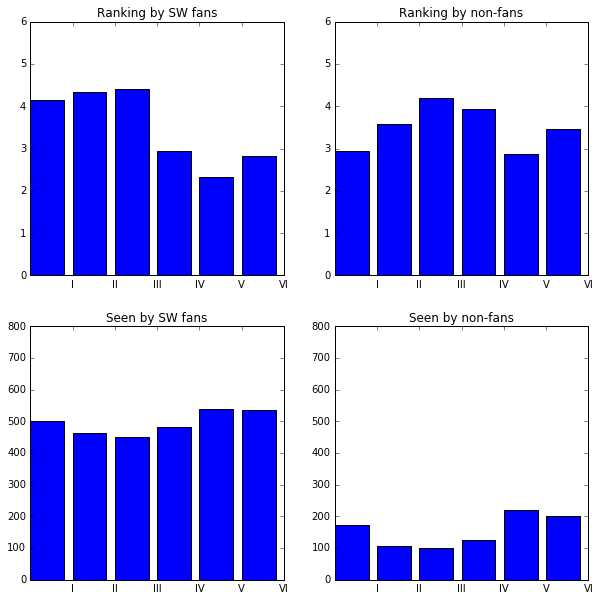

In [34]:
swfans=star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
swnon=star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

meanswfans=swfans[swfans.columns[9:15]].mean()
meanswnon=swnon[swnon.columns[9:15]].mean()
sumswfans=swfans[swfans.columns[3:9]].sum()
sumswnon=swnon[swnon.columns[3:9]].sum()

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
ax1.bar(range(6),meanswfans)
ax1.set_xticklabels(['','I','II','III','IV','V','VI'])
ax1.set_ylim(0,6)
ax1.set_title("Ranking by SW fans")
ax2.bar(range(6),meanswnon)
ax2.set_xticklabels(['','I','II','III','IV','V','VI'])
ax2.set_ylim(0,6)
ax2.set_title("Ranking by non-fans")
ax3.bar(range(6),sumswfans)
ax3.set_xticklabels(['','I','II','III','IV','V','VI'])
ax3.set_ylim(0,800)
ax3.set_title("Seen by SW fans")
ax4.bar(range(6),sumswnon)
ax4.set_xticklabels(['','I','II','III','IV','V','VI'])
ax4.set_ylim(0,800)
ax4.set_title("Seen by non-fans")

It seems that _Star Wars_ fans prefer the most recent movies, specially Episode V (remember that lower values indicate more preference). Non-fans consider the first movie and Episode V as the best, so we can see that Episode V migth me a great film, despite considering as a saga fan or not.

It is not surprising to see the difference in total views by fans/non-fans, but the tendency seems simmilar in both cases. Episode V and VI are the most seen movies, while Episode II and III are the least seen.

### Gender
Let's divide into gender to see their preferences.

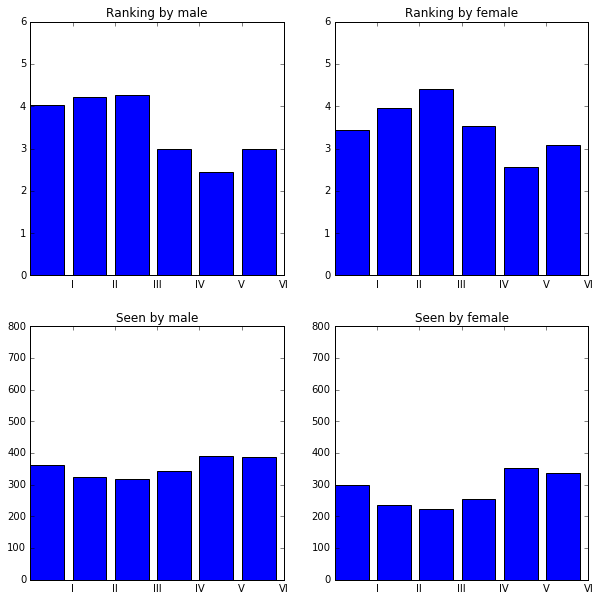

In [36]:
male=star_wars[star_wars["Gender"] == "Male"]
female=star_wars[star_wars["Gender"] == "Female"]

meanmale=male[male.columns[9:15]].mean()
meanfemale=female[female.columns[9:15]].mean()
summale=male[male.columns[3:9]].sum()
sumfemale=female[female.columns[3:9]].sum()

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
ax1.bar(range(6),meanmale)
ax1.set_xticklabels(['','I','II','III','IV','V','VI'])
ax1.set_ylim(0,6)
ax1.set_title("Ranking by male")
ax2.bar(range(6),meanfemale)
ax2.set_xticklabels(['','I','II','III','IV','V','VI'])
ax2.set_ylim(0,6)
ax2.set_title("Ranking by female")
ax3.bar(range(6),summale)
ax3.set_xticklabels(['','I','II','III','IV','V','VI'])
ax3.set_ylim(0,800)
ax3.set_title("Seen by male")
ax4.bar(range(6),sumfemale)
ax4.set_xticklabels(['','I','II','III','IV','V','VI'])
ax4.set_ylim(0,800)
ax4.set_title("Seen by female")

The plots displayed above do not show many differences between genders. Episode III and IV show more preference in males, but the most liked film is episode V, once again.
While comparing the total viewers, we can assume that the saga has more male fans, and they have seen all the movies equally. There are more females that saw the last movies, rather than the first episodes, specially II, III and IV.